In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [12]:
from sklearn import linear_model

In [14]:
data = {'x':[13,19,16,14,15,14],
    'y':[40,83,62,48,58,43]}

In [17]:
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


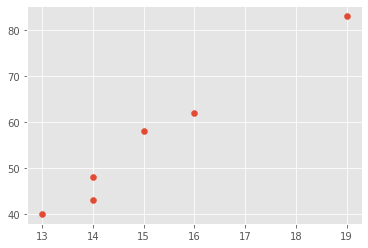

In [18]:
plt.scatter(data=data,x='x',y='y',)

In [19]:
lr=linear_model.LinearRegression()

In [24]:
lr.fit(X = pd.DataFrame(data['x']),y = data['y'])

LinearRegression()

In [26]:
y_pred = lr.predict(pd.DataFrame(data['x']))

In [28]:
lr.intercept_

-55.481751824817515

In [29]:
lr.coef_

array([7.32846715])

In [30]:
residuals = data['y']- y_pred

In [32]:
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [38]:
SSE = (residuals**2).sum()
SST = ((data['y']-data['y'].mean())**2).sum()

In [39]:
R_squared = 1-(SSE/SST)

In [40]:
R_squared

0.9753156179610034

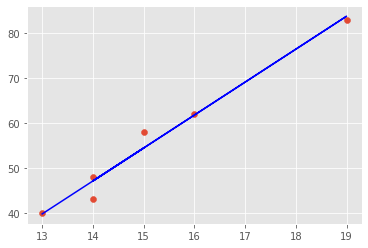

In [42]:
plt.scatter(data=data,x='x',y='y',)
plt.plot(data['x'],y_pred,color='blue')

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
lr.score(pd.DataFrame(data['x']),data['y'])

0.9753156179610034

In [46]:
mean_squared_error(data['y'],y_pred)

5.172749391727503

In [47]:
rmse = mean_squared_error(data['y'],y_pred)**0.5
rmse

2.2743679103714736

In [50]:
boston_house_price = load_boston()

In [52]:
boston_house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [54]:
print(boston_house_price.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
df_price = pd.DataFrame(boston_house_price.data)
df_price.columns = boston_house_price.feature_names

In [64]:
df_price['PRICE'] = boston_house_price.target
df_price.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [65]:
df_price.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

(10.0, 45.0)

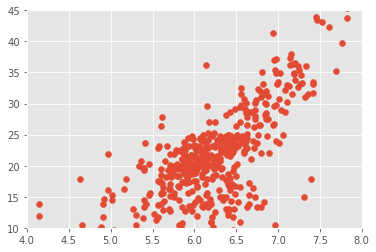

In [68]:
plt.scatter(data=df_price,x='RM',y='PRICE')
plt.xlim(4,8)
plt.ylim(10,45)

In [70]:
lr.fit(pd.DataFrame(df_price['RM']),df_price['PRICE'])

LinearRegression()

In [71]:
y_pred2 = lr.predict(pd.DataFrame(df_price['RM']))

In [72]:
lr.intercept_

-34.670620776438554

In [73]:
lr.coef_

array([9.10210898])

In [74]:
residuals2 = df_price['PRICE'] - y_pred2

In [75]:
residuals2.describe()

count    5.060000e+02
mean    -1.330512e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: PRICE, dtype: float64

In [77]:
lr.score(pd.DataFrame(df_price['RM']),df_price['PRICE'])

0.48352545599133423

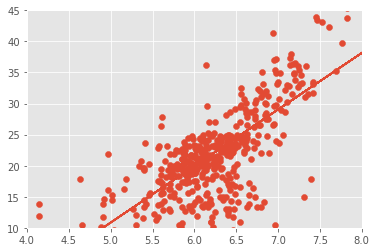

In [80]:
plt.scatter(data=df_price,x='RM',y='PRICE')
plt.xlim(4,8)
plt.ylim(10,45)
plt.plot(df_price['RM'],y_pred2)

In [85]:
# mse
mean_squared_error(df_price['PRICE'],y_pred2)

43.60055177116956

In [86]:
# rmse
mean_squared_error(df_price['PRICE'],y_pred2)**0.5

6.603071389222561

In [87]:
# r_squared
lr.score(pd.DataFrame(df_price['RM']),df_price['PRICE'])

0.48352545599133423